In [ ]:
%matplotlib widget

# NeuroKit
Eine Python-Toolbox für Statistik und neurophysiologische Signalverarbeitung (EEG, EDA, EKG, EMG, ...)
Muss wieder zuert importiert werden:

In [ ]:
import neurokit2 as nk
import scipy as sp

In [ ]:
print(nk.__version__)
print(sp.__version__)

0.0.42
1.6.0


Daten laden und plotten:

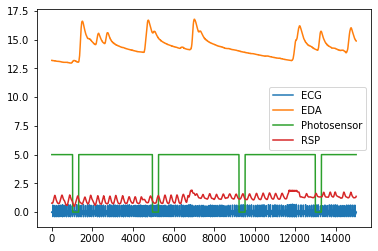

In [ ]:
import pandas as pd
data = nk.data("bio_eventrelated_100hz")
data.plot()

Die Daten sind von einem Teilnehmer, dem vier Bilder gezeigt wurden. Diese vier Bilder sind auch im Photosensor Signal als Minimum zu sehen. Dieses Event kann mit `events_find()` lokalisiert werden. Zwei Arten von Bildern mit unterschiedlichen Arten von Emotionen wurden gezeigt: 'Negative' und 'Neutral'.

In [ ]:
condition_list = ["Negative", "Neutral", "Neutral", "Negative"]

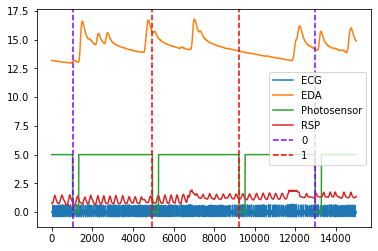

In [ ]:
events = nk.events_find(data["Photosensor"], threshold_keep='below', event_conditions=condition_list)
plot = nk.events_plot(events, data)

## Beispiel für EKG Signalverarbeitung

In [ ]:
# Get data
data = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit/master/data/bio_resting_5min_100hz.csv")
data.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
# Process ecg
ecg_signals, info = nk.ecg_process(data["ECG"], sampling_rate=100)
plot = nk.ecg_plot(ecg_signals[:3000], sampling_rate=100)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
nk.ecg_intervalrelated(ecg_signals)

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,86.392105,3.883777,69.475638,4.903604,3.888256,0.07058,0.055901,69.0,4.4478,0.064461,...,0.542658,0.457342,4.676883,4.293525,0.531295,0.468705,3.565916,3.349293,0.796565,1.978637


Signal wird in aufgeteilt und Parameter per Abschnitt berechnet

In [ ]:
epochs = nk.epochs_create(ecg_signals, events=[0, 15000], sampling_rate=100, epochs_start=0, epochs_end=150)

In [ ]:
nk.ecg_intervalrelated(epochs)

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
1,86.389814,3.638450,69.497674,5.167181,3.645389,0.074350,0.052354,69.0,4.4478,0.064461,...,0.508029,0.491971,4.821461,4.744652,0.510436,0.489564,3.657265,3.581708,1.024080,1.252763
2,86.394396,4.032578,69.460465,4.648090,4.042033,0.066917,0.058056,69.0,4.4478,0.064461,...,0.592447,0.407553,4.562113,3.783845,0.565247,0.434753,3.498203,3.067941,0.543132,1.881786


Weiteres: https://pypi.org/project/neurokit2/